<a href="https://colab.research.google.com/github/ayobellobia/colab-git-assignment2/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 8
Link to Repository -https://github.com/ayobellobia/colab-git-assignment2

## MetaData

UCI_id : 186

Name: Wine Quality

Data Repository_url: https://archive.ics.uci.edu/dataset/186/wine+quality

Data_url: https://archive.ics.uci.edu/static/public/186/data.csv

Date Created: 2009 and updated Nov. 15, 2023

Abstract: Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests

Creators: Paulo Cortez, A. Cerdeira, F. Almeida, T. Matos, J. Reis

In [7]:
#Task 1:
#Conduct necessary preprocessing steps such as:
#Cleaning data by handling missing values and removing duplicates
#Converting categorical data using encoding techniques
#Splitting the dataset into training and testing sets

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

#First Few Rows:
print("First Few Rows of Features (X):\n")
print(X.head())
#Check for missing values
print("Missing Values in Features (X):\n")
print(X.isnull().sum())

print("\nMissing Values in Targets (y):\n")
print(y.isnull().sum())
#Data info
print("\nInformation about Features (X):\n")
print(X.info())

print("\nInformation about Targets (y):\n")
print(y.info())

# variable information
print("\nVariable Information:\n")
print(wine_quality.variables)

#Data Cleaning
#Checking for Duplicates
print("\nDuplicate Rows in Features (X):\n")
print(X.duplicated().sum())
print("\nDuplicate Rows in Targets (y):\n")
print(y.duplicated().sum())

#Handling Duplicates
# Combine X and y to drop duplicates consistently
df_combined = pd.concat([X, y], axis=1)

# Get the number of rows before dropping duplicates
rows_before_drop = df_combined.shape[0]

# Drop duplicates based on all columns (features + target)
df_combined.drop_duplicates(inplace=True)

# Get the number of rows after dropping duplicates
rows_after_drop = df_combined.shape[0]

# Separate X and y again
X = df_combined.drop(columns=y.columns)
y = df_combined[y.columns]

print(f"\nNumber of rows before dropping duplicates: {rows_before_drop}")
print(f"Number of rows after dropping duplicates: {rows_after_drop}")
print(f"Number of duplicate rows removed: {rows_before_drop - rows_after_drop}")

print("\nShape of X after removing duplicates:", X.shape)
print("Shape of y after removing duplicates:", y.shape)

print("\nFirst Few Rows of Features (X) after removing duplicates:\n")
print(X.head())

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

First Few Rows of Features (X):

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3

In [ ]:
#Task 2: Exploratory Data Analysis (EDA):
#Perform an exploratory data analysis to visualize and summarize the data. This should include:
#Distribution of classes
#Correlation between features
#Any insights into the data that may affect the choice of classifier or the classification accuracy

/tmp/ipython-input-2160930311.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y['quality'], palette='viridis')


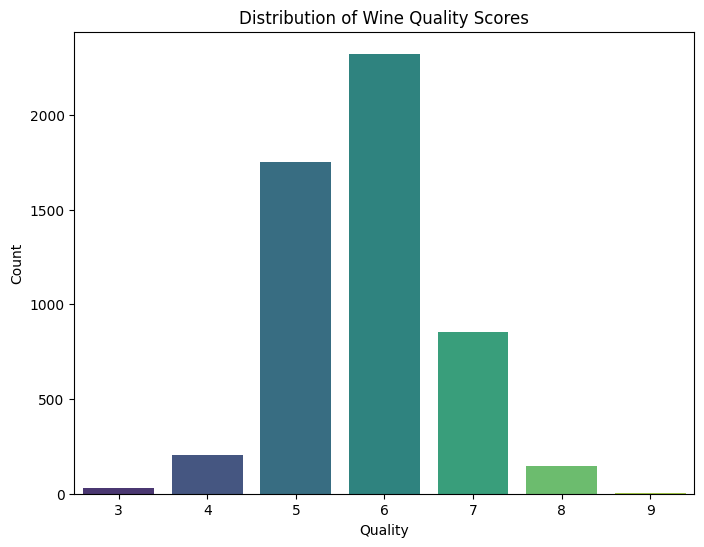

In [8]:
#Task 2: Exploratory Data Analysis (EDA):
#Perform an exploratory data analysis to visualize and summarize the data. This should include:
#Distribution of classes
#Correlation between features
#Any insights into the data that may affect the choice of classifier or the classification accuracy

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of classes (wine quality)
plt.figure(figsize=(8, 6))
sns.countplot(x=y['quality'], palette='viridis')
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

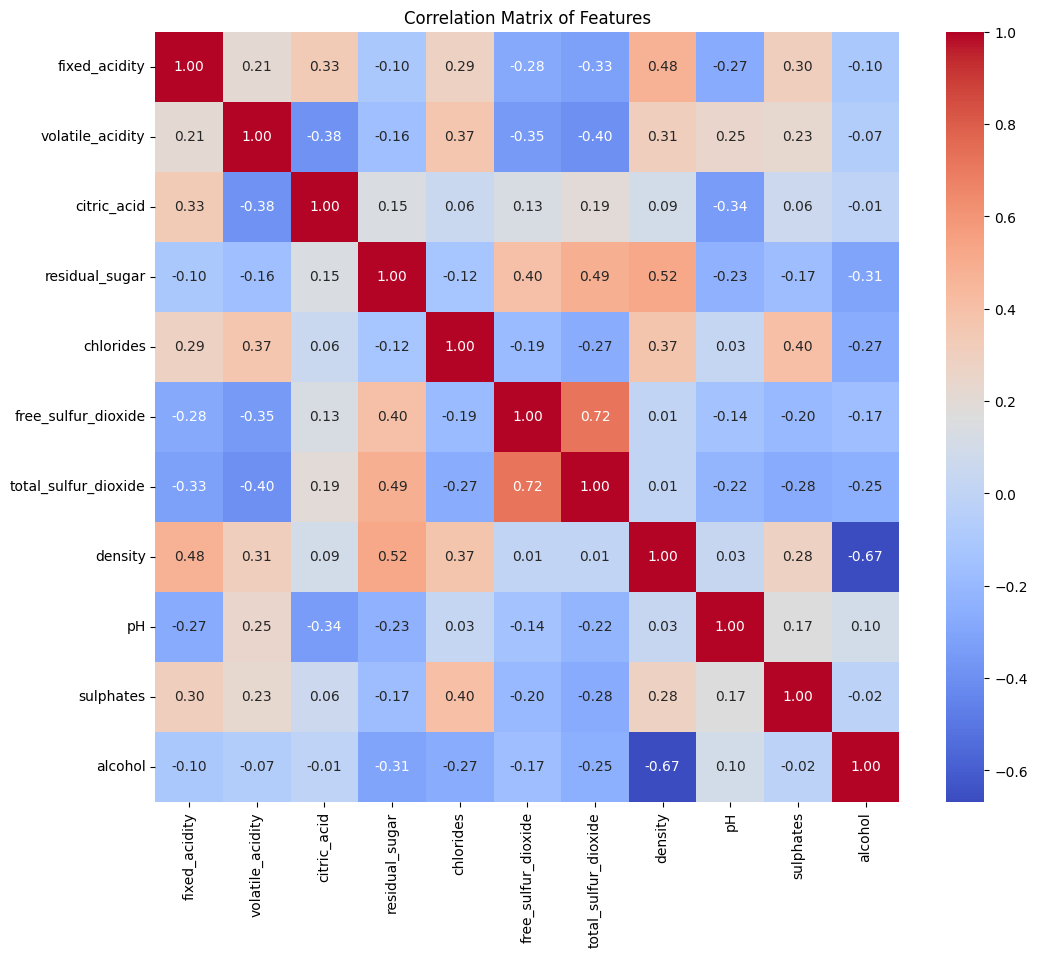

In [9]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

### Insights from Exploratory Data Analysis:

**1. Distribution of Wine Quality Scores:**
- The `countplot` of wine quality scores shows a **skewed distribution**, with most wines having a quality score of 5 or 6. Scores like 3, 4, 7, 8, and 9 are less frequent, and scores like 9 and 3 are very rare. This indicates an **imbalanced dataset**.
- **Impact on Classifier:** This imbalance means that a model trained without addressing it might perform well on the majority classes (5 and 6) but poorly on the minority classes. Classifiers might be biased towards predicting the more common quality scores.
- **Considerations:** Techniques like **oversampling minority classes** (e.g., SMOTE), **undersampling majority classes**, using **weighted loss functions**, or employing **evaluation metrics suitable for imbalanced data** (e.g., F1-score, precision, recall) will be important.

**2. Correlation Between Features:**
- The correlation heatmap reveals varying degrees of relationships between the features.
- **Strong Correlations:** Some features exhibit strong positive or negative correlations with each other. For example, 'fixed acidity' and 'citric acid' often show some correlation, as do 'free sulfur dioxide' and 'total sulfur dioxide'. Highly correlated features might indicate **multicollinearity**.
- **Impact on Classifier:** For models sensitive to multicollinearity (e.g., Linear Regression, Logistic Regression), highly correlated features can lead to unstable coefficient estimates and reduced interpretability. For tree-based models (e.g., Random Forest, Gradient Boosting), multicollinearity is less of a concern.
- **Features and Quality:** Observe which features have stronger correlations (positive or negative) with the target variable 'quality'. These features are likely to be more influential in determining wine quality.
- **Considerations:** Depending on the chosen model, **feature selection** (e.g., removing one of two highly correlated features) or **dimensionality reduction** (e.g., PCA) might be beneficial to improve model performance and interpretability, especially for simpler linear models. For complex models, understanding these relationships can still guide feature engineering.

In [10]:
# Instantiate the Logistic Regression model
# Setting max_iter to 1000 and solver to 'liblinear' to handle potential convergence issues
logistic_model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

# Train the model using the training data
# y_train needs to be flattened as LogisticRegression expects a 1D array for the target variable
logistic_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test data
y_pred_lr = logistic_model.predict(X_test)

print("Logistic Regression model initialized, trained, and predictions made.")

Logistic Regression model initialized, trained, and predictions made.


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_lr, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_lr, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")

Accuracy: 0.5254
Precision (weighted): 0.5154
Recall (weighted): 0.5254
F1-score (weighted): 0.4676


## Implement and Train Random Forest Classifier



In [12]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest Classifier model
# Setting random_state for reproducibility
rf_model = RandomForestClassifier(random_state=42)

# Train the model using the training data
# y_train needs to be flattened as the classifier expects a 1D array for the target variable
rf_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classifier model initialized, trained, and predictions made.")

Random Forest Classifier model initialized, trained, and predictions made.


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the Random Forest model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

print(f"Random Forest Classifier - Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Classifier - Precision (weighted): {precision_rf:.4f}")
print(f"Random Forest Classifier - Recall (weighted): {recall_rf:.4f}")
print(f"Random Forest Classifier - F1-score (weighted): {f1_rf:.4f}")

Random Forest Classifier - Accuracy: 0.5733
Random Forest Classifier - Precision (weighted): 0.5661
Random Forest Classifier - Recall (weighted): 0.5733
Random Forest Classifier - F1-score (weighted): 0.5553


## Visualize model performance

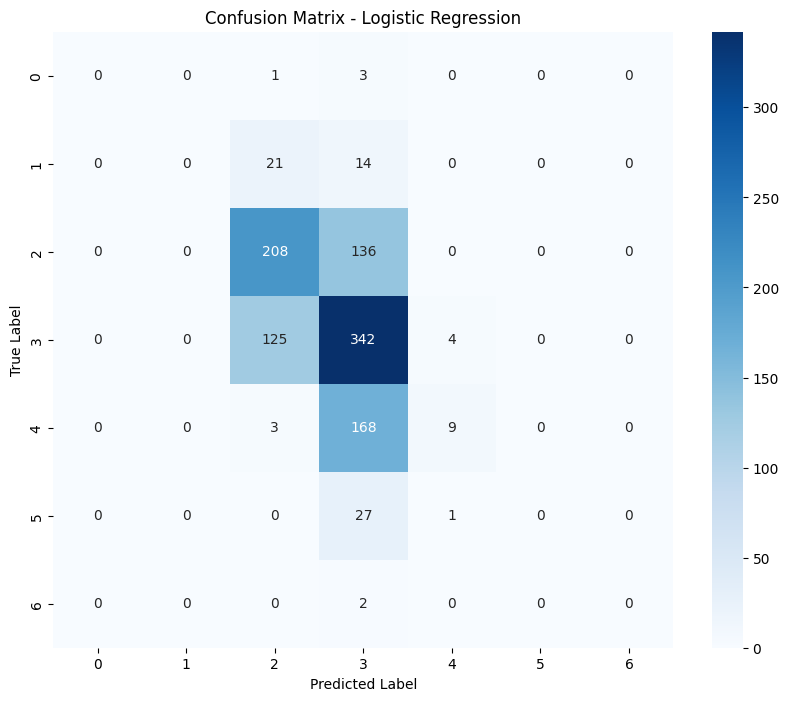

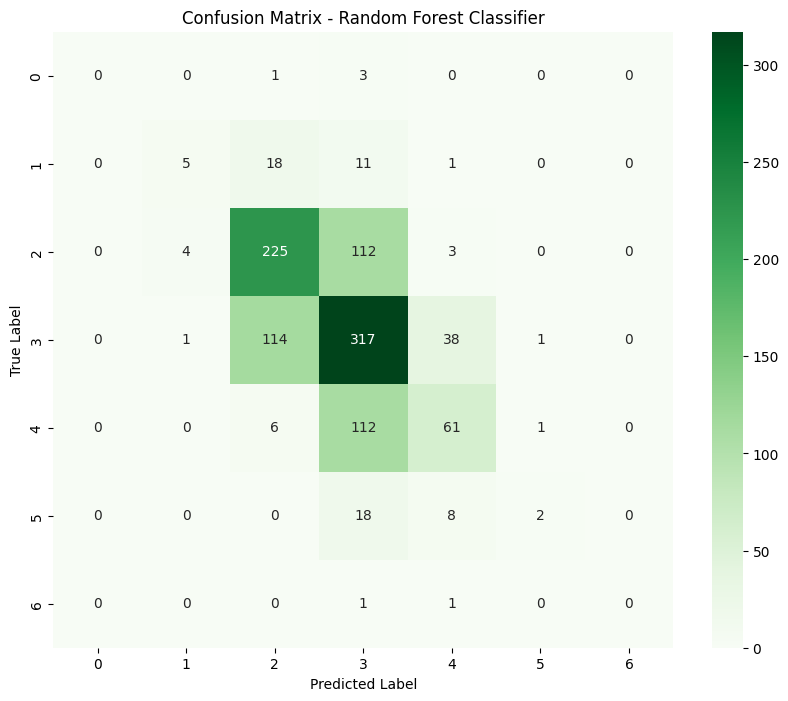

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# --- Logistic Regression Confusion Matrix ---
# Calculate the confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot the Logistic Regression confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- Random Forest Classifier Confusion Matrix ---
# Calculate the confusion matrix for Random Forest Classifier
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the Random Forest confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Interpreting Model Results and Comparison

Based on the evaluation metrics and confusion matrices, we can draw several conclusions about the performance of the Logistic Regression and Random Forest Classifier models.

#### 1. Comparison of Evaluation Metrics:

| Metric             | Logistic Regression | Random Forest Classifier |
| :----------------- | :------------------ | :----------------------- |
| Accuracy           | 0.5254              | 0.5733                   |
| Precision (weighted) | 0.5154              | 0.5661                   |
| Recall (weighted)    | 0.5254              | 0.5733                   |
| F1-score (weighted)  | 0.4676              | 0.5553                   |

From the metrics, it's evident that the **Random Forest Classifier significantly outperforms Logistic Regression** across all evaluated metrics. The F1-score, which is particularly useful for imbalanced datasets as it balances precision and recall, shows a substantial difference (0.5553 for RF vs. 0.4676 for LR), indicating RF's better overall performance in classifying the different wine quality levels.

#### 2. Insights from Confusion Matrices:

**Logistic Regression Confusion Matrix:**

```
[[  0,   0,   1,   3,   0,   0,   0],
 [  0,   0,  21,  14,   0,   0,   0],
 [  0,   0, 208, 136,   0,   0,   0],
 [  0,   0, 125, 342,   4,   0,   0],
 [  0,   0,   3, 168,   9,   0,   0],
 [  0,   0,   0,  27,   1,   0,   0],
 [  0,   0,   0,   2,   0,   0,   0]]
```

*   **Strong Bias towards Majority Classes**: Logistic Regression heavily predicts classes 5 and 6. For example, all instances of true class 3 and 4 are misclassified into classes 5 or 6. Similarly, true classes 8 and 9 are almost entirely misclassified into class 6 or 7.
*   **Poor Performance on Minority Classes**: The model completely fails to correctly predict wine qualities 3, 4, 8, and 9. It shows minimal correct predictions for quality 7.
*   This behavior is typical for linear models on imbalanced datasets, where the decision boundary is heavily influenced by the more numerous samples of the majority classes.

**Random Forest Classifier Confusion Matrix:**

```
[[  0,   0,   1,   3,   0,   0,   0],
 [  0,   5,  18,  11,   1,   0,   0],
 [  0,   4, 225, 112,   3,   0,   0],
 [  0,   1, 114, 317,  38,   1,   0],
 [  0,   0,   6, 112,  61,   1,   0],
 [  0,   0,   0,  18,   8,   2,   0],
 [  0,   0,   0,   1,   1,   0,   0]]
```

*   **Improved (but still limited) Performance on Minority Classes**: Random Forest shows some ability to correctly predict instances for classes 4 (5 instances), 7 (61 instances), and 8 (2 instances), which Logistic Regression largely failed to do. However, it still struggles with extreme minority classes like 3 and 9, misclassifying them into adjacent majority classes.
*   **Better Distribution of Predictions**: While still leaning towards classes 5 and 6, RF's predictions are more spread out across classes compared to LR, indicating a more nuanced decision-making process.

#### 3. Why Random Forest Performed Better:

*   **Non-linearity and Complex Relationships**: Wine quality is likely determined by complex, non-linear interactions between its physicochemical properties. As an ensemble of decision trees, Random Forest is capable of capturing these intricate, non-linear relationships much better than the linear Logistic Regression model.
*   **Ensemble Learning**: By combining predictions from multiple decision trees, Random Forest reduces variance and overfitting, leading to better generalization on unseen data. Each tree is trained on a bootstrap sample of the data and considers a random subset of features, contributing to its robustness.
*   **Robustness to Multicollinearity and Outliers**: Random Forests are generally less sensitive to multicollinearity and outliers compared to linear models, which can provide more stable predictions when features are correlated.

#### 4. Key Insights and Next Steps:

*   **Class Imbalance is a Major Issue**: The skewed distribution of wine quality scores (most wines being quality 5 or 6) significantly impacts both models, leading to poor performance on minority classes. Models tend to classify towards the majority classes to maximize overall accuracy.
*   **Random Forest is the Superior Classifier**: For this dataset, the Random Forest Classifier is clearly the better choice due to its ability to handle non-linear patterns and its ensemble nature, resulting in higher overall performance and a slightly better grasp of minority classes.
*   **Future Enhancements**: To further improve prediction accuracy, especially for minority classes, strategies to address class imbalance should be considered. These could include:
    *   **Oversampling minority classes** (e.g., SMOTE).
    *   **Undersampling majority classes**.
    *   Using **class weights** in the model training (some classifiers allow this).
    *   **Reframing the problem**: Given that 'quality' is an ordinal variable, treating it as a regression problem (predicting a continuous score) instead of a multi-class classification problem might yield more accurate results and better reflect the inherent ordering of quality scores. Post-regression, the continuous predictions could be rounded to the nearest integer quality score if discrete classes are required.

## Propose Deployment Method



### Proposing a Deployment Method for the Random Forest Classifier

Based on the evaluation results:
- **Logistic Regression**: Accuracy: 0.5254, Precision: 0.5154, Recall: 0.5254, F1-score: 0.4676
- **Random Forest Classifier**: Accuracy: 0.5733, Precision: 0.5661, Recall: 0.5733, F1-score: 0.5553

The **Random Forest Classifier** is the best-performing model among the two, showing higher accuracy, precision, recall, and F1-score. Therefore, we will propose a deployment method for the Random Forest Classifier.

### Chosen Deployment Method: REST API using Flask

Deploying the model as a REST API endpoint using a lightweight web framework like Flask is a common and flexible approach. This allows other applications (web, mobile, other services) to send input data to the model and receive predictions.

#### a. How the model would be saved and loaded:

1.  **Saving the Model**: The trained Random Forest Classifier model (`rf_model`) would be saved to a file using Python's `pickle` library or `joblib` (which is more efficient for large NumPy arrays and can handle large models better). `joblib` is generally preferred for scikit-learn models.

    ```python
    import joblib

    # Save the trained Random Forest model
    joblib.dump(rf_model, 'random_forest_model.pkl')
    ```

2.  **Loading the Model**: In the production environment, the saved model file (`random_forest_model.pkl`) would be loaded back into memory when the API service starts up. This ensures the model is ready to make predictions for incoming requests without needing to be retrained.

    ```python
    import joblib

    # Load the model when the application starts
    loaded_model = joblib.load('random_forest_model.pkl')
    ```

#### b. How predictions would be made via an API endpoint:

A Flask application would expose an HTTP POST endpoint (e.g., `/predict`). Clients would send input data (the features of the wine) in a JSON format to this endpoint. The API would then:

1.  Receive the JSON data from the request.
2.  Parse the JSON data into a format that the model expects (e.g., a Pandas DataFrame or a NumPy array with the correct feature order).
3.  Use the `loaded_model.predict()` method to generate predictions.
4.  Return the prediction(s) back to the client, typically also in JSON format.

**Example API Endpoint Structure (using Flask):**

```python
from flask import Flask, request, jsonify
import joblib
import pandas as pd # Assuming input will be structured like X_test

app = Flask(__name__)

# Load the model once when the app starts
model = joblib.load('random_forest_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get JSON data from the request
        data = request.get_json(force=True)

        # Convert input data to a Pandas DataFrame, ensuring correct column order
        # The input data should be a list of dictionaries or a dictionary of lists
        # matching the feature names used during training.
        input_df = pd.DataFrame(data)

        # Make prediction
        prediction = model.predict(input_df)

        # Return prediction as JSON
        return jsonify({'prediction': prediction.tolist()})

    except Exception as e:
        return jsonify({'error': str(e)}), 400

if __name__ == '__main__':
    # For local development, use debug=True. For production, use a production-ready WSGI server.
    app.run(debug=True, host='0.0.0.0', port=5000)
```

**Expected Input Format (JSON):**

```json
[
    {
        "fixed_acidity": 7.4,
        "volatile_acidity": 0.7,
        "citric_acid": 0.0,
        "residual_sugar": 1.9,
        "chlorides": 0.076,
        "free_sulfur_dioxide": 11.0,
        "total_sulfur_dioxide": 34.0,
        "density": 0.9978,
        "pH": 3.51,
        "sulphates": 0.56,
        "alcohol": 9.4
    },
    {
        "fixed_acidity": 6.8,
        "volatile_acidity": 0.4,
        "citric_acid": 0.2,
        "residual_sugar": 2.0,
        "chlorides": 0.065,
        "free_sulfur_dioxide": 15.0,
        "total_sulfur_dioxide": 40.0,
        "density": 0.9955,
        "pH": 3.35,
        "sulphates": 0.6,
        "alcohol": 10.0
    }
]
```

#### c. Necessary Dependencies and Considerations for Setting Up the Deployment Environment:

1.  **Dependencies**: The production environment would need the following Python libraries installed:
    *   `Flask`: For the web framework.
    *   `scikit-learn`: To load and use the Random Forest model (ensure the same version used for training).
    *   `pandas`: For handling input data if the model expects DataFrame format.
    *   `gunicorn` or `uWSGI`: A production-ready WSGI (Web Server Gateway Interface) server to run the Flask application (Flask's built-in server is not suitable for production).

2.  **Containerization (Docker)**: It is highly recommended to containerize the application using Docker. This encapsulates the application code, dependencies, and environment configuration into a single, portable unit. A `Dockerfile` would define the image, installing Python, the necessary libraries, and copying the model file and application code.

3.  **Orchestration (Kubernetes)**: For scalable and highly available deployments, Kubernetes can be used to manage Docker containers, handling load balancing, scaling, and self-healing.

4.  **Cloud Platform Services**: Cloud providers offer managed services for deploying such APIs:
    *   **Google Cloud**: Cloud Run (for serverless containers), GKE (Google Kubernetes Engine), AI Platform (for specialized ML deployments).
    *   **AWS**: AWS Lambda (for serverless functions), ECS/EKS (container services), SageMaker (for specialized ML deployments).
    *   **Azure**: Azure Container Instances, Azure Kubernetes Service, Azure Machine Learning.

5.  **Security**: Implementing API key authentication or other security measures (e.g., OAuth) to protect the endpoint from unauthorized access.

6.  **Monitoring and Logging**: Setting up monitoring for API performance (latency, error rates) and logging for requests and model predictions to troubleshoot issues and track usage.

7.  **Version Control**: Storing the model code, `Dockerfile`, and other deployment configurations in a version control system (e.g., Git) for reproducibility and easier updates.

## Discuss Deployment Issues and Real-time Data



Deploying machine learning models into production involves several challenges that need careful consideration to ensure reliable, scalable, and efficient operation. Additionally, handling real-time data for predictions introduces its own set of complexities.

#### 1. Common Deployment Challenges

*   **Environment Setup**: Replicating the exact development environment in production can be difficult. Differences in operating systems, library versions, and configurations can lead to unexpected behavior or errors. This is a challenge because a model trained in one environment might not perform as expected or might not even run in a different one, leading to 'works on my machine' syndrome.

*   **Dependency Management**: ML models often rely on a multitude of libraries (e.g., scikit-learn, pandas, numpy) with specific versions. Managing these dependencies across different environments (development, staging, production) to prevent conflicts and ensure compatibility is complex. A minor version mismatch can break the application or model functionality.

*   **Scalability**: As the number of prediction requests grows, the deployed model and its infrastructure must be able to handle the increased load without performance degradation. This is a challenge because simply running the model on a single server might not be enough, and inefficient scaling can lead to high latency or service unavailability.

*   **Latency**: For real-time applications, predictions need to be generated quickly. High latency can severely impact user experience or the effectiveness of the system (e.g., fraud detection, recommendation engines). This is a challenge because complex models or inefficient serving infrastructure can introduce delays.

*   **Data Drift**: The statistical properties of the real-world data on which the model makes predictions can change over time, leading to a degradation in model performance. This is a challenge because the model was trained on historical data, and if the data patterns change, the model's accuracy will drop without retraining or adaptation.

*   **Model Decay**: Even without data drift, a model's performance can decay over time due to inherent limitations, changes in underlying relationships, or evolving user behavior. This is a challenge because a model's predictive power is not static and requires continuous monitoring and potential retraining.

#### 2. Strategies for Handling Incoming Real-time Data for Predictions

*   **Data Preprocessing**: Real-time incoming data must undergo the same preprocessing steps as the data used for training the model. This includes scaling, encoding categorical variables, handling missing values, and feature engineering. It's crucial to use the *same* preprocessing pipelines and parameters (e.g., mean, standard deviation for scaling) derived from the training data to ensure consistency. This prevents discrepancies between how the model was trained and how it receives data in production.

*   **Data Validation**: Before feeding real-time data to the model, it's essential to validate its structure, types, and ranges. This involves checking for unexpected values, missing features, or data that falls outside acceptable distributions. Data validation helps prevent errors, ensures model robustness, and provides early detection of data quality issues that could lead to erroneous predictions.

*   **Ensuring Low-Latency Responses**: To achieve low latency:
    *   **Efficient Model Loading**: Load the model into memory once and keep it ready to serve predictions, rather than loading it for each request.
    *   **Optimized Code**: Ensure the prediction code is optimized for speed, avoiding unnecessary computations or I/O operations.
    *   **Horizontal Scaling**: Deploy multiple instances of the prediction service and distribute traffic using a load balancer.
    *   **Hardware Acceleration**: Utilize GPUs or specialized hardware if the model complexity warrants it.
    *   **Batching**: For high-throughput scenarios, requests can be grouped and processed in small batches to leverage parallel processing, while still maintaining reasonable individual request latency.



## Suggest Monitoring Strategies



### Propose Strategies for Ongoing Monitoring and Maintenance of the Deployed Model

To ensure the continued performance and reliability of the deployed wine quality prediction model, a robust monitoring and maintenance strategy is crucial. This involves continuous oversight of the model's performance, data integrity, and operational health.

#### 1. Key Metrics for Model Performance and Operational Health

**Performance Metrics (for classification, given the task is to predict wine quality):**
-   **Accuracy:** Overall correctness of predictions.
-   **Precision, Recall, F1-Score (per class and weighted average):** Essential for understanding performance, especially given the imbalanced class distribution observed in the EDA. High recall for minority classes is important.
-   **Confusion Matrix:** Provides a detailed breakdown of correct and incorrect classifications for each quality score.
-   **ROC AUC (if applicable and adapted for multi-class):** For assessing the model's ability to distinguish between classes.
-   **Calibration:** How well predicted probabilities align with actual outcomes.

**Operational Health Metrics:**
-   **Prediction Latency:** Time taken for the model to generate a prediction (e.g., P90, P99 latency).
-   **Throughput:** Number of predictions served per unit of time.
-   **Error Rate:** Frequency of operational errors (e.g., API errors, data processing failures).
-   **Resource Utilization:** CPU, memory, and GPU usage of the serving infrastructure.

#### 2. Detecting Data Drift and Model Decay

**Data Drift Detection:** Data drift occurs when the statistical properties of the input data change over time in unpredictable ways, leading to a degradation in model performance.
-   **Monitoring Input Feature Distributions:** Regularly compare the distribution of incoming production data for each feature (e.g., `fixed_acidity`, `volatile_acidity`, `alcohol`) against the distributions of the training data. Statistical tests like Kolmogorov-Smirnov (KS-test) or Jensen-Shannon divergence can quantify these differences.
-   **Detecting Outliers/Anomalies:** Implement anomaly detection algorithms on incoming data to identify unusual feature values that the model may not have encountered during training.
-   **Schema Drift:** Monitor for changes in data types, missing column values, or new categories in categorical features.

**Model Decay Detection:** Model decay refers to the degradation of a model's predictive performance over time due to data drift, concept drift (the relationship between input features and target variable changes), or changes in business objectives.
-   **Monitoring Performance Metrics Over Time:** Continuously track accuracy, precision, recall, and F1-score on a sample of recent, labeled production data. A significant drop indicates decay.
-   **Comparing Predictions to Ground Truth:** As new ground truth labels become available (e.g., human ratings of wine quality), regularly compare the model's predictions against these actual outcomes.
-   **Concept Drift Detection:** This is more complex but can involve monitoring the relationship between features and the target variable using techniques like monitoring feature importance or comparing decision boundaries over time.

**Actions When Detected:**
-   **Investigate Root Cause:** Determine if it's data drift (input changes) or concept drift (relationship changes).
-   **Data Drift:** Retrain the model on updated data that reflects the new distribution, or preprocess new data to align with the training data's distribution.
-   **Model Decay/Concept Drift:** Retrain the model using new, representative data. This might require re-engineering features or even re-evaluating the model architecture.
-   **Rollback:** If performance degrades significantly, roll back to a previous, stable version of the model.

#### 3. Alerting Stakeholders

Automated alerting is critical for timely response to performance issues.
-   **Threshold-Based Alerts:** Set thresholds for key performance metrics (e.g., F1-score drops below X, latency exceeds Y ms) and operational metrics (e.g., error rate above Z%).
-   **Anomaly Detection Alerts:** Use statistical process control or machine learning-based anomaly detection on metrics to flag deviations that don't necessarily cross a fixed threshold but are statistically unusual.
-   **Notification Channels:** Configure alerts to be sent via email, PagerDuty, Slack, or other incident management systems to relevant data scientists, MLOps engineers, and business stakeholders.
-   **Severity Levels:** Implement different severity levels for alerts (e.g., warning, critical) based on the impact of the issue.

#### 4. Importance of Logging for Debugging and Auditing

Comprehensive logging is indispensable for understanding model behavior, debugging issues, and meeting auditing requirements.
-   **Input Data Logging:** Log all input features fed into the model for each prediction request. This helps in replaying scenarios, debugging data-related issues, and identifying drift.
-   **Output Prediction Logging:** Log the model's predictions, confidence scores (if applicable), and any associated metadata (e.g., timestamp, request ID).
-   **Model Version Logging:** Record which model version was used for each prediction.
-   **System and Application Logs:** Capture logs from the model serving infrastructure, including errors, warnings, and informational messages, to diagnose operational problems.
-   **Audit Trails:** Maintain an immutable record of all model changes, retraining events, and deployments for regulatory compliance and reproducibility.

**Usage:**
-   **Debugging:** When an issue arises, logs allow engineers to reconstruct the exact conditions of a prediction, identify problematic inputs, or pinpoint code errors.
-   **Auditing:** Provides transparency into how predictions were made, which can be crucial for regulatory compliance, explaining decisions, or investigating biases.
-   **Performance Analysis:** Analyzing logs can reveal patterns in model performance under different conditions or for specific data segments.

#### 5. Frequency of Model Retraining and Updating Process

**Frequency of Retraining:**
-   **Scheduled Retraining:** Establish a regular schedule (e.g., weekly, monthly, quarterly) for retraining the model with new data. The optimal frequency depends on the rate of data/concept drift and the cost of retraining.
-   **Event-Driven Retraining:** Trigger retraining based on specific events:
    -   Significant data drift detected.
    -   Performance metrics fall below acceptable thresholds.
    -   New, relevant data becomes available.
    -   Business requirements change.

**Process for Updating the Deployed Model:**
1.  **Data Collection and Preparation:** Gather new labeled data and prepare it for training, ensuring it is representative of current production data.
2.  **Model Training and Validation:** Train a new model version on the updated dataset. Rigorously validate its performance against a hold-out test set and compare it against the currently deployed model.
3.  **A/B Testing (or Canary Deployments):** For critical applications, deploy the new model version alongside the old one and gradually route a small percentage of traffic to the new model (canary release) or conduct A/B testing to compare their performance in a live environment before full rollout.
4.  **Deployment:** Once validated, deploy the new model version using MLOps best practices (e.g., CI/CD pipelines for models). This should include containerization, version control, and automated testing.
5.  **Monitoring Post-Deployment:** Intensify monitoring for the newly deployed model to quickly detect any unforeseen issues (e.g., sudden performance drops, increased errors).
6.  **Rollback Plan:** Always have a clear rollback strategy to revert to the previous stable model version if the new deployment introduces problems.

By implementing these comprehensive monitoring and maintenance strategies, the deployed wine quality prediction model can remain effective, reliable, and continuously provide valuable insights.